In [1]:
import pandas as pd
import numpy as np
import scipy.linalg
import datetime
from numba import jit
from numba import autojit



In [2]:
path = 'c:/data'
gridfile='GridExport.csv'
hf=path + '\\' +gridfile
grid=pd.read_csv(hf)
grid.columns

Index(['Value', 'Row', 'Column'], dtype='object')

In [3]:
grid[0:10]

,Value,Row,Column
0,1248.295383,0,0
1,1248.055496,0,1
2,1247.742844,0,2
3,1247.296085,0,3
4,1246.913047,0,4
5,1246.784435,0,5
6,1246.836164,0,6
7,1246.973330,0,7
8,1247.041542,0,8
9,1246.927089,0,9


In [4]:
grid.shape


(37430, 3)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

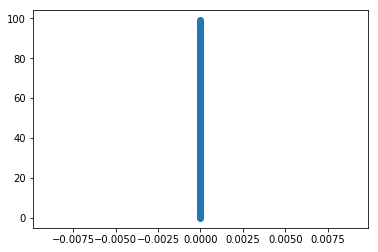

In [6]:
plt.scatter(grid['Row'][0:100],grid['Column'][0:100])

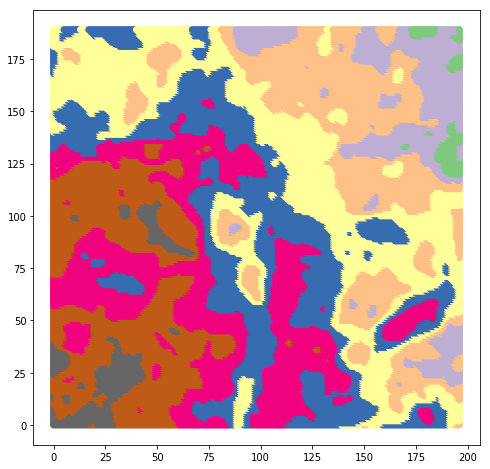

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x=grid['Column'],y=grid['Row'],c=grid['Value'],cmap='Accent')


In [8]:
grid[['Column']=0,['Row']=0]

SyntaxError: invalid syntax (<ipython-input-8-d397302174fd>, line 1)

In [9]:
grid.shape

(37430, 3)

In [10]:
img = np.array(grid['Value'])
Z=img.reshape(190,197)



In [11]:
Z.shape

(190, 197)

(-0.5, 189.5)

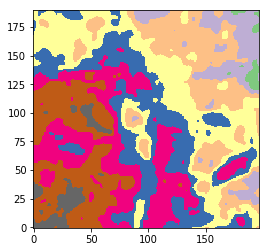

In [12]:
plt.imshow(Z, cmap='Accent')
plt.ylim(min(plt.ylim()), max(plt.ylim()))
#plt.xlim(max(plt.xlim()), min(plt.xlim()))

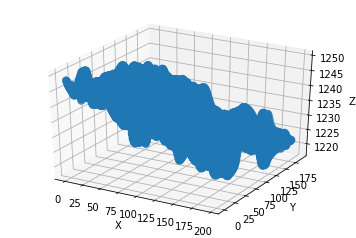

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(grid['Column'],grid['Row'],grid['Value'], cmap= 'Accent', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')



In [14]:
i=0

data=np.zeros((9,3))
for x in range(0,3):
    for y in range (0,3):
        #data=np.append(data,[x,y,Z[x,y]])
        data[i]=[x,y,Z[x,y]]
        i+=1
        
data
#data=  Z[x-1:x+2,y-1:y+2]
#data =


array([[  0.00000000e+00,   0.00000000e+00,   1.24829538e+03],
       [  0.00000000e+00,   1.00000000e+00,   1.24805550e+03],
       [  0.00000000e+00,   2.00000000e+00,   1.24774284e+03],
       [  1.00000000e+00,   0.00000000e+00,   1.24771990e+03],
       [  1.00000000e+00,   1.00000000e+00,   1.24747764e+03],
       [  1.00000000e+00,   2.00000000e+00,   1.24720303e+03],
       [  2.00000000e+00,   0.00000000e+00,   1.24713195e+03],
       [  2.00000000e+00,   1.00000000e+00,   1.24684953e+03],
       [  2.00000000e+00,   2.00000000e+00,   1.24655377e+03]])

In [15]:
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
C[:10]

array([  1.24829285e+03,  -5.29277083e-01,  -2.28703917e-01,
        -6.41175000e-03,  -2.86955000e-02,  -1.97420000e-02])

In [16]:
 # from Curvature Attributes and their Application in 3D Interpreted Horizons. Roberts 

f,d,e,c,a,b = C 

In [17]:
dip_rad = np.arctan(np.sqrt(d**2+e**2))
dip_ang = 180*dip_rad/np.pi
dip_ang

29.966710688421283

In [18]:
# K== curvature
Kmean = (a*(1+e**2)-c*d*e+b*(1+d**2))/(1+d**2+e**2)**(3/2)
Kmean

-0.035559702855675605

In [19]:
Kgaus=(4*a*b-c**2)/(1+d**2+e**2)**2
Kgaus

0.0012531943426311544

In [20]:
Kmax = Kmean + (Kmean**2-Kgaus)**.5
Kmax

-0.032198434560405297

In [21]:
Kmin = Kmean - (Kmean**2-Kgaus)**.5
Kmin

-0.038920971150945914

In [22]:
Kplus = (a+b)+((a-b)**2+c**2)**.5
Kplus

-0.037424975297718724

In [23]:
Kminus = (a+b)-((a-b)**2+c**2)**.5
Kminus

-0.059450024702065993

In [24]:
#Shape Index
Si=2/np.pi*np.arctan((Kmin+Kmax)/(Kmax-Kmin))
Si


-0.94000201030528707

In [25]:
#Dip Curvature
Kd=2*(a*e**2-c*d*e+b*d**2)/((d**2+e**2)*(1+d**2+e**2)**.5)
Kd

-0.032601342981922028

In [26]:
#Strike Curvature
Ks=

SyntaxError: invalid syntax (<ipython-input-26-f1bd95c7c6a4>, line 2)

In [27]:

Colmax,Rowmax=Z.shape
print(Colmax,Rowmax)

190 197


In [28]:
Colmax,Rowmax=Z.shape
data=np.zeros((81,3))
Kmean=np.zeros(Z.shape)
Kgaus=np.zeros(Z.shape)
Kmax=np.zeros(Z.shape)
Kmin=np.zeros(Z.shape)
Kplus=np.zeros(Z.shape)
Kminus=np.zeros(Z.shape)
Si=np.zeros(Z.shape)

ti=datetime.datetime.now()
#@autojit
def runK():
    for ci in range(4,Colmax-7):
        for ri in range(4,Rowmax-7):
            i=0
            for xs in range(0,9):   #xs range to cacl surface
                x=xs+ci-1           
                for ys in range (0,9):
                    y=ys+ri-1
                    #print(x,y)
                    data[i]=[xs,ys,Z[x,y]]
                    i+=1

            A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
            C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
            f,d,e,c,a,b = C
            Kmean[ci,ri] = (a*(1+e**2)-c*d*e+b*(1+d**2))/(1+d**2+e**2)**(3/2)
            Kgaus[ci,ri]=(4*a*b-c**2)/(1+d**2+e**2)**2
            Kmax[ci,ri] = Kmean[ci,ri] + (Kmean[ci,ri]**2-Kgaus[ci,ri])**.5
            Kmin[ci,ri] = Kmean[ci,ri] - (Kmean[ci,ri]**2-Kgaus[ci,ri])**.5
            Kplus[ci,ri] = (a+b)+((a-b)**2+c**2)**.5
            Kminus[ci,ri] = (a+b)-((a-b)**2+c**2)**.5
            Si[ci,ri]=2/np.pi*np.arctan((Kmin[ci,ri]+Kmax[ci,ri])/(Kmax[ci,ri]-Kmin[ci,ri]))

runK()
tstop=datetime.datetime.now()
trun = tstop-ti
print(trun)
                


0:00:13.016595


(-0.5, 189.5)

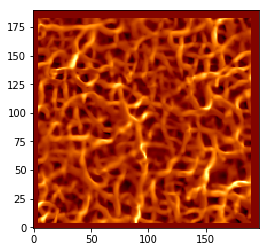

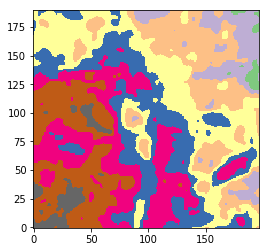

In [30]:
plt.figure(1)
plt.imshow(Kmax,cmap='afmhot')
plt.ylim(min(plt.ylim()), max(plt.ylim()))

plt.figure(2)
plt.imshow(Z, cmap='Accent')
plt.ylim(min(plt.ylim()), max(plt.ylim()))
